In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
!pip install quandl
import quandl

In [45]:
data = quandl.get("NSE/TATAGLOBAL")

In [46]:
data.head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98
2010-07-28,118.0,120.50,117.20,118.15,118.25,835593.0,994.01
2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134.0,2791.03
2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191.0,3112.68
2010-08-02,117.3,118.50,116.60,118.10,117.30,663593.0,779.85


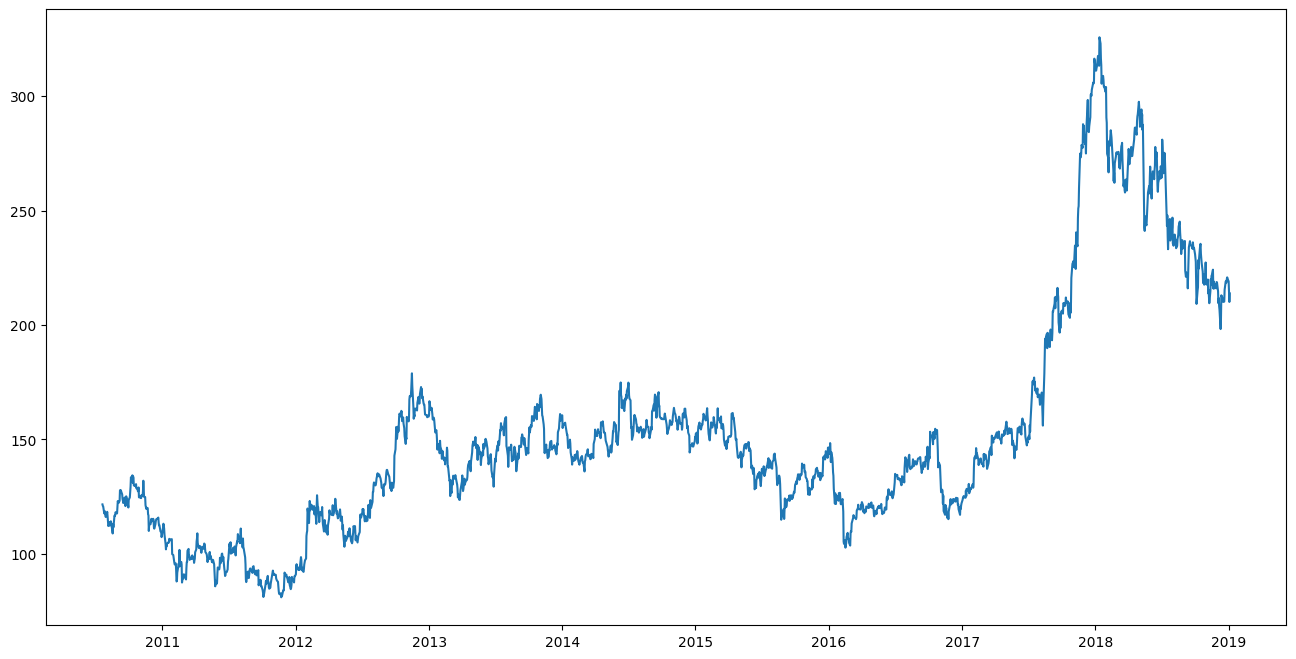

In [47]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Closing Price')

**Classification Problem:** Buy(+1) or sell(-1) the stock

In [48]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()

**Input Features to predict whether customer should buy or sell the stock**

In [49]:
x = data[['Open - Close', 'High - Low']]
x.head()

,Open - Close,High - Low
Date,,
2010-07-21,0.55,1.95
2010-07-22,-0.60,1.75
2010-07-23,1.15,1.70
2010-07-26,2.50,3.90
2010-07-27,-1.05,7.50


**Intention is to store +1 for the buy signal and -1 for the sell signal. The target variable is 'y' for classification task.**

In [50]:
Y = np.where(data['Close'].shift(-1)>data['Close'],1,-1)

In [51]:
Y

array([-1, -1, -1, ..., -1,  1, -1])

In [119]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.25, random_state = 23)

**Implementation of KNN Classifier**

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [121]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

In [122]:
#fit the model
model.fit(x_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [123]:
#Accuracy Score
accuracy_train = accuracy_score(Y_train, model.predict(x_train))
accuracy_test = accuracy_score(Y_test, model.predict(x_test))

#Printing results
print('Training data Accuracy:', accuracy_train)
print('Testing data Accuracy:', accuracy_test)

Training data Accuracy: 0.6101587301587301
Testing data Accuracy: 0.5447619047619048


In [124]:
predictions_classification = model.predict(x_test)

In [125]:
actual_predicted_data = pd.DataFrame({'Actual Class' :Y_test, 'Predicted Class':predictions_classification})

In [126]:
actual_predicted_data.head(10)

,Actual Class,Predicted Class
0,1,-1
1,1,-1
2,1,-1
3,-1,-1
4,-1,-1
5,1,-1
6,1,-1
7,-1,-1
8,-1,1
9,1,1


**Regression Problem Using KNN**

In [127]:
y = data['Close']

In [128]:
y

Date
2010-07-21    121.55
2010-07-22    120.90
2010-07-23    120.65
2010-07-26    117.60
2010-07-27    118.65
               ...  
2018-12-31    219.40
2019-01-01    219.10
2019-01-02    214.60
2019-01-03    210.05
2019-01-04    213.80
Name: Close, Length: 2100, dtype: float64

In [153]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

In [154]:
# Splitting data into training and testing data
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y, test_size=0.25)

In [156]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)

In [161]:
#fit the model
model_reg.fit(x_train_reg,y_train_reg)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [162]:
#Doing predictions using the model
predictions = model_reg.predict(x_test_reg)

In [163]:
print(predictions)

[155.58666667 180.78333333 132.14       133.68       178.27666667
 124.89666667 185.6        225.89333333 237.26333333 154.41666667
 124.35333333 244.57       138.4        119.30666667 135.83
 158.82666667 143.29333333 158.70333333 134.41666667 197.91
 156.15666667 165.15333333 178.50666667 155.57333333 169.07
 137.25333333 131.05333333 133.93333333 124.39333333 130.76333333
 239.17333333 127.73333333 180.24333333 154.12333333 157.22666667
 205.69666667 154.53       122.40666667 168.81333333 131.24333333
 158.15333333 159.97666667 120.58333333 114.81333333 138.90666667
 134.35666667 166.40333333 158.32333333 134.36       181.4
 137.92666667 134.30333333 133.11666667 149.84       168.56
 192.16333333 190.87       143.42666667 149.03333333 163.55
 130.39       136.36       162.87333333 183.51666667 121.79666667
 122.59       192.59333333 126.54666667 140.99666667 160.61
 146.23666667 147.01       144.92       138.03       144.42666667
 214.61333333 126.57333333 125.37666667 121.39666667 

In [164]:
# Root Mean Square Error of the prediction
rms = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)), 2)))
rms

57.24855817153456

In [165]:
valid = pd.DataFrame({'Actual Close':y_test_reg, 'Predicted Close Value':predictions})

In [166]:
valid.head(10)

,Actual Close,Predicted Close Value
Date,,
2014-04-03,151.55,155.586667
2017-08-17,190.60,180.783333
2015-11-11,127.90,132.140000
2017-04-03,151.90,133.680000
2013-02-21,138.00,178.276667
2011-06-10,95.85,124.896667
2018-01-25,304.25,185.600000
2018-12-10,198.20,225.893333
2018-08-01,235.65,237.263333
